#**Knn para classificação de Breast Cancer Patients**

Aplicando um modelo KNN sobre o dataframe biopsy (biblioteca MASS). Ele traz dados sobre biopsias e classifica seus resultados como benignos e malignos.

Explorando a base e aplicando o modelo após inspecionar se existem atributos que não podem ser aplicados, se existe a necessidade de normalização ou transformação dos dados, tratar dados faltantes.Experimentando diferentes valores de K, calculando a acuracidade obtida sobre o conjunto de testes.

Empregarei nesse modelo 1/3 de dados de teste e 2/3 para treino, neste exercício aplicarei a média de 100 diferentes execuções para obter a acuracidade final do modelo.

OBSERVAÇÕES SOBRE O KNN NO R:

i. É um modelo de Aprendizado Supervisionado

ii. Os dados de entrada x ( x -- > y ) não podem ser categóricos (usar one hot encode quand neccessário)

iii. A saída do modelo será a classe atribuída ao registro

iv. Os dados devem estar na mesma escala (padronizados ou normalizados quando necessário)

v. A avaliação do modelo é realizada com a matriz de confusão

vi. Dados ausentes precisam ser tratados antes, outliers não necessáriamente

## Preparação

In [ ]:
install.packages('caret')

library(MASS)    # Biblioteca com a base de dados "biopsy" que será usada neste estudo
library(dplyr)   # Analises estatisticas
library(ggplot2) # Exploração Gráfica
library(caret)   # Forma opcional de amostragem (CreateDataPartition) e matrix de confusão (confusionMatrix)
library(class)   # Para usar a função knn() para o modelo de k-vizinhos mais próximos
library(glue)    # print especial

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’



Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


## Analise Exploratória dos dados

Dicionário de dados:

Todas as colunas, com a excessão da variável "ID" (qualitativa nominal) e da variável "class"(qualitativa ordinal com 2 fatores) são quantitativas discretas com números entre 1 e 10. 


     ‘V1’ clump thickness.

     ‘V2’ uniformidade do tamanho da célula

     ‘V3’ uniformidade da forma celular.

     ‘V4’ adesão marginal

     ‘V5’ tamanho único da célula epitelial.

     ‘V6’ núcleos nus (16 values are missing).

     ‘V7’ cromatina branda.

     ‘V8’ nucléolos normais.

     ‘V9’ mitoses.

     ‘ID’ sample code number (not unique).

     ‘class’ ‘"benign"’ or ‘"malignant"’

In [ ]:
df <- biopsy

In [ ]:
nrow(df)

[1] 699

In [ ]:
ncol(df)

[1] 11

Dataframe com 11 variáveis, 699 registros, e 16 dados faltantes na coluna V6

In [ ]:
head(df, 5)

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,1000025,5,1,1,1,2,1,3,1,1,benign
2,1002945,5,4,4,5,7,10,3,2,1,benign
3,1015425,3,1,1,1,2,2,3,1,1,benign
4,1016277,6,8,8,1,3,4,3,7,1,benign
5,1017023,4,1,1,3,2,1,3,1,1,benign


In [ ]:
tail(df,5)

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
695,776715,3,1,1,1,3,2,1,1,1,benign
696,841769,2,1,1,1,2,1,1,1,1,benign
697,888820,5,10,10,3,7,3,8,10,2,malignant
698,897471,4,8,6,4,3,4,10,6,1,malignant
699,897471,4,8,8,5,4,5,10,4,1,malignant


Os dados mantém a mesma estrutura no começo e no final

In [ ]:
str(df)

'data.frame':	699 obs. of  11 variables:
 $ ID   : chr  "1000025" "1002945" "1015425" "1016277" ...
 $ V1   : int  5 5 3 6 4 8 1 2 2 4 ...
 $ V2   : int  1 4 1 8 1 10 1 1 1 2 ...
 $ V3   : int  1 4 1 8 1 10 1 2 1 1 ...
 $ V4   : int  1 5 1 1 3 8 1 1 1 1 ...
 $ V5   : int  2 7 2 3 2 7 2 2 2 2 ...
 $ V6   : int  1 10 2 4 1 10 10 1 1 1 ...
 $ V7   : int  3 3 3 3 3 9 3 3 1 2 ...
 $ V8   : int  1 2 1 7 1 7 1 1 1 1 ...
 $ V9   : int  1 1 1 1 1 1 1 1 5 1 ...
 $ class: Factor w/ 2 levels "benign","malignant": 1 1 1 1 1 2 1 1 1 1 ...


Confirmamos com o str() a estrutura dos dados e o tipo de cada variável

In [ ]:
summary(df)

      ID                  V1               V2               V3        
 Length:699         Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 Class :character   1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 1.000  
 Mode  :character   Median : 4.000   Median : 1.000   Median : 1.000  
                    Mean   : 4.418   Mean   : 3.134   Mean   : 3.207  
                    3rd Qu.: 6.000   3rd Qu.: 5.000   3rd Qu.: 5.000  
                    Max.   :10.000   Max.   :10.000   Max.   :10.000  
                                                                      
       V4               V5               V6               V7        
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 2.000  
 Median : 1.000   Median : 2.000   Median : 1.000   Median : 3.000  
 Mean   : 2.807   Mean   : 3.216   Mean   : 3.545   Mean   : 3.438  
 3rd Qu.: 4.000   3rd Qu.: 4.000   3rd Qu.: 6.000   3rd Qu.: 5.000  
 Max.   :10.000   

Com a função summmary() visualizamos as medidas de tendência central e distribuição dos dados, vemos que para todos eles o menor valor é 1 e o maior é 10, em todos a mediana está abaixo de 3, e 75% dos valores são menores que 6. Existem 458 registros de benigno e 241 de maligno.

In [ ]:
sum(is.na(df$V6))

[1] 16

In [ ]:
df <- na.omit(biopsy)
sum(is.na(df$V6))

[1] 0

In [ ]:
nrow(df)

[1] 683

In [ ]:
table(df$class)


   benign malignant 
      444       239 

Como a quantidade de dados faltantes é pequena (2%). Optei pela remoção dos dados que passaram a ter 444 registros de benigno e 239 registros de maligno

In [ ]:
correlacao <- cor(select(df, -ID, -class))
correlacao

,V1,V2,V3,V4,V5,V6,V7,V8,V9
V1,1.0000000,0.6424815,0.6534700,0.4878287,0.5235960,0.5930914,0.5537424,0.5340659,0.3509572
V2,0.6424815,1.0000000,0.9072282,0.7069770,0.7535440,0.6917088,0.7555592,0.7193460,0.4607547
V3,0.6534700,0.9072282,1.0000000,0.6859481,0.7224624,0.7138775,0.7353435,0.7179634,0.4412576
V4,0.4878287,0.7069770,0.6859481,1.0000000,0.5945478,0.6706483,0.6685671,0.6031211,0.4188983
V5,0.5235960,0.7535440,0.7224624,0.5945478,1.0000000,0.5857161,0.6181279,0.6289264,0.4805833
V6,0.5930914,0.6917088,0.7138775,0.6706483,0.5857161,1.0000000,0.6806149,0.5842802,0.3392104
V7,0.5537424,0.7555592,0.7353435,0.6685671,0.6181279,0.6806149,1.0000000,0.6656015,0.3460109
V8,0.5340659,0.7193460,0.7179634,0.6031211,0.6289264,0.5842802,0.6656015,1.0000000,0.4337573
V9,0.3509572,0.4607547,0.4412576,0.4188983,0.4805833,0.3392104,0.3460109,0.4337573,1.0000000


As colunas V3 e V2 são as mais correlacionadas com as demais

A coluna V9 e V1 são as que parecem ter menor correlação entre si

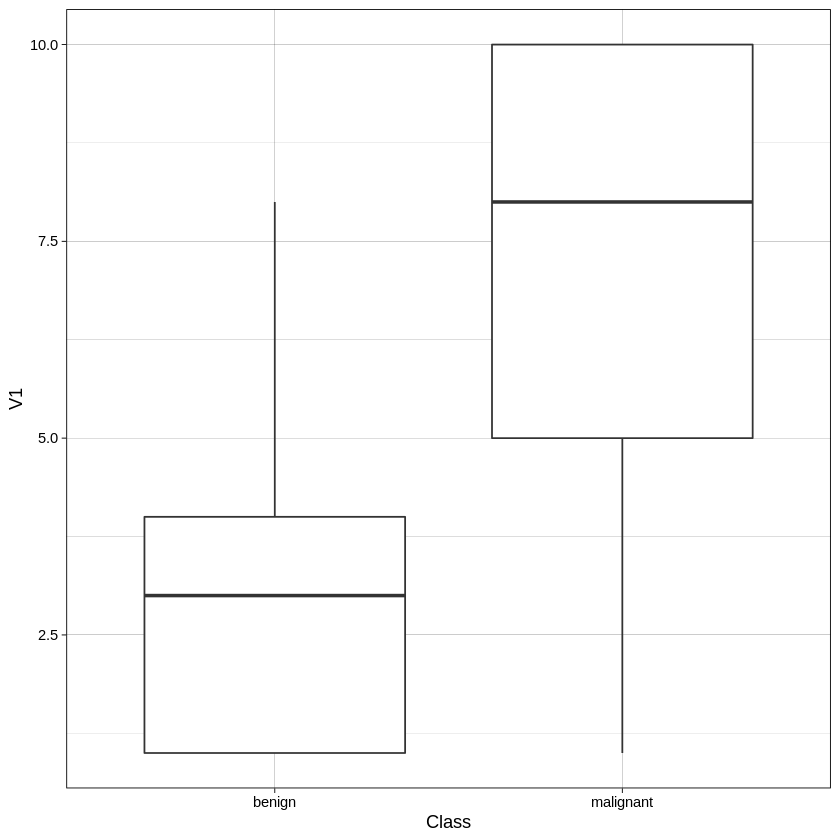

In [ ]:
ggplot(df, aes(x=class, y= V1)) + geom_boxplot() + labs(x = "Class", y = "V1") + theme_linedraw()

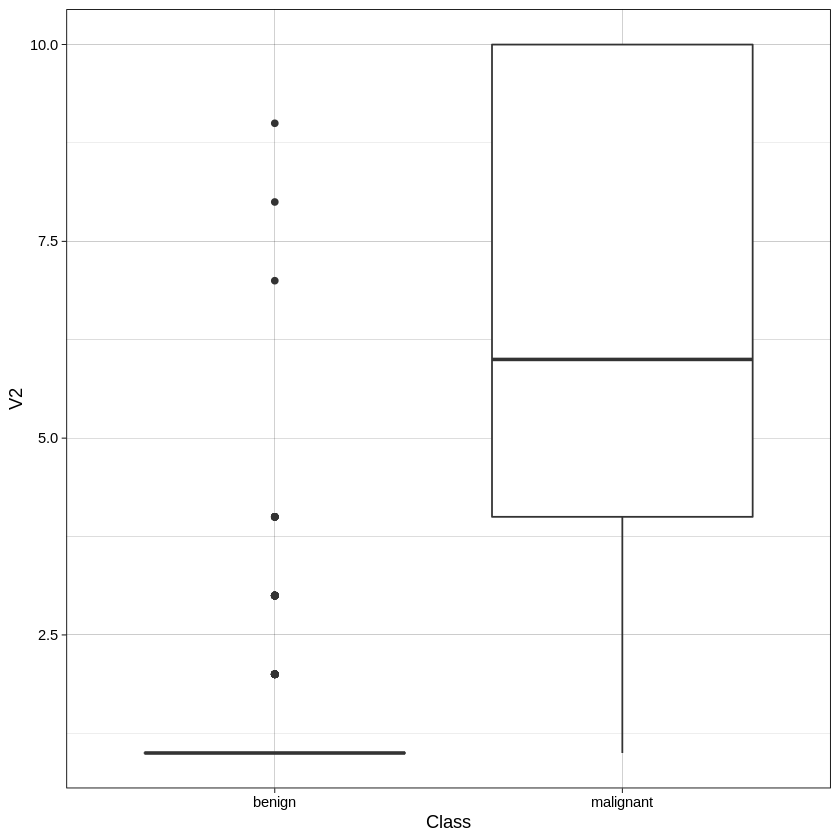

In [ ]:
ggplot(df, aes(x=class, y= V2)) + geom_boxplot() + labs(x = "Class", y = "V2") + theme_linedraw()

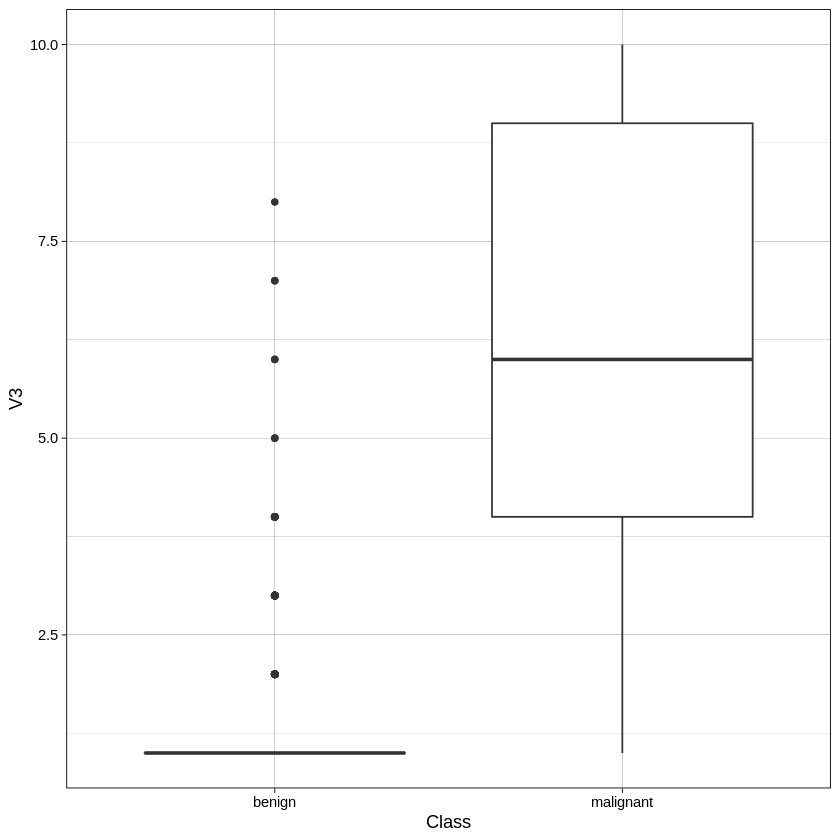

In [ ]:
ggplot(df, aes(x=class, y= V3)) + geom_boxplot() + labs(x = "Class", y = "V3") + theme_linedraw()

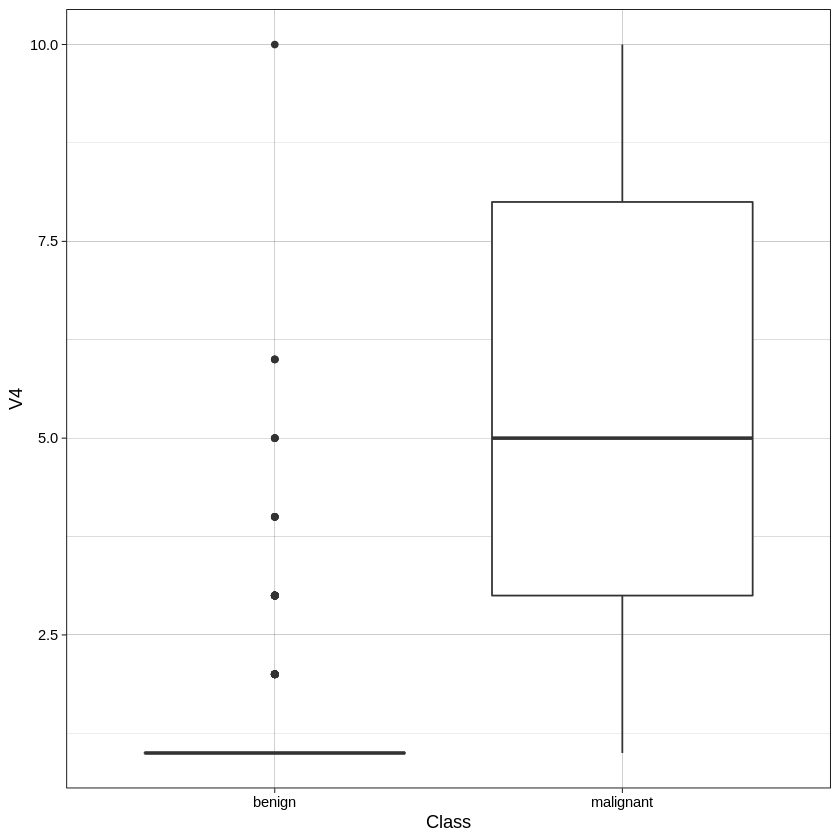

In [ ]:
ggplot(df, aes(x=class, y= V4)) + geom_boxplot() + labs(x = "Class", y = "V4") + theme_linedraw()

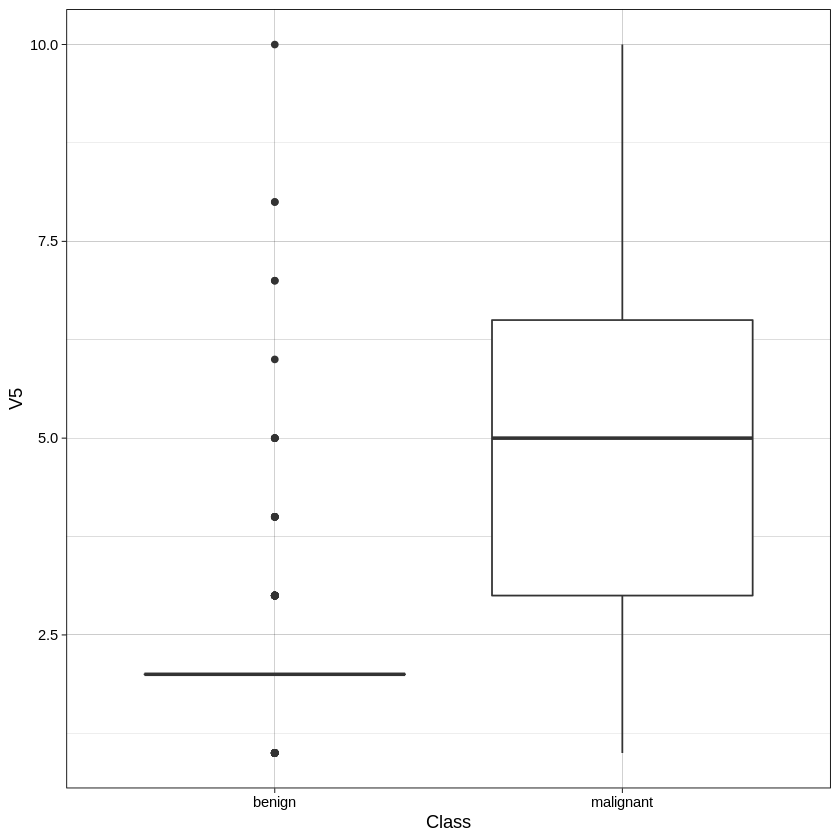

In [ ]:
ggplot(df, aes(x=class, y= V5)) + geom_boxplot() + labs(x = "Class", y = "V5") + theme_linedraw()

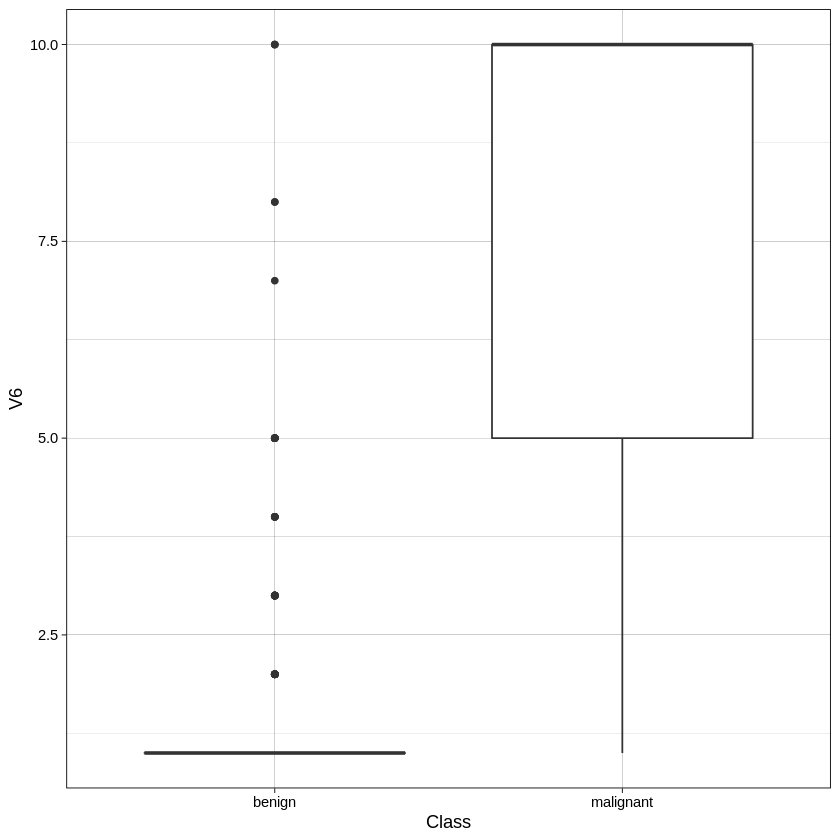

In [ ]:
ggplot(df, aes(x=class, y= V6)) + geom_boxplot() + labs(x = "Class", y = "V6") + theme_linedraw()

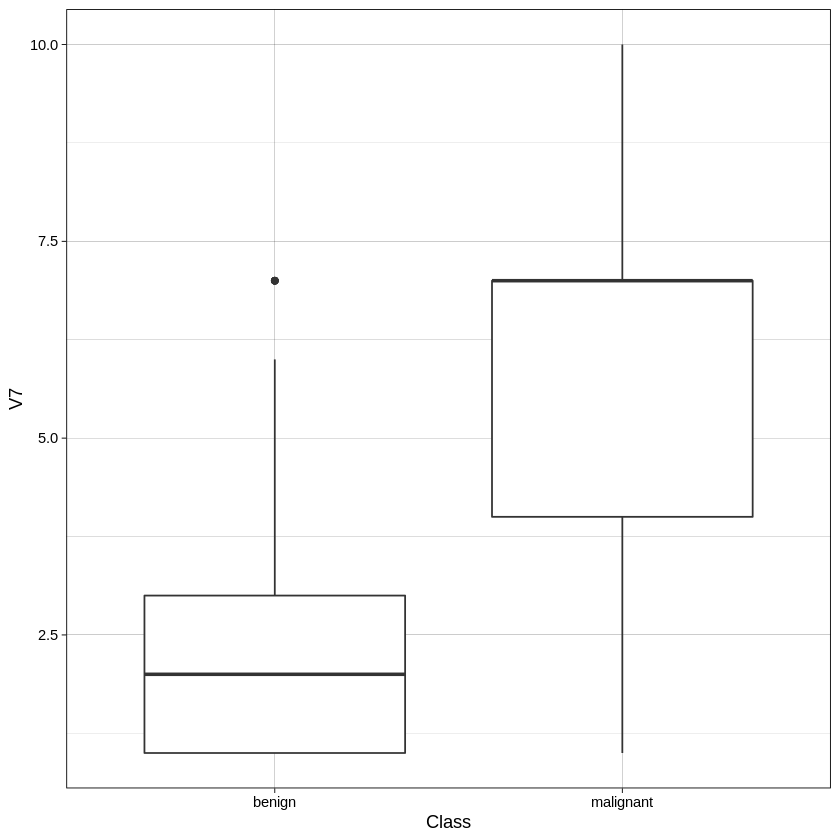

In [ ]:
ggplot(df, aes(x=class, y= V7)) + geom_boxplot() + labs(x = "Class", y = "V7") + theme_linedraw()

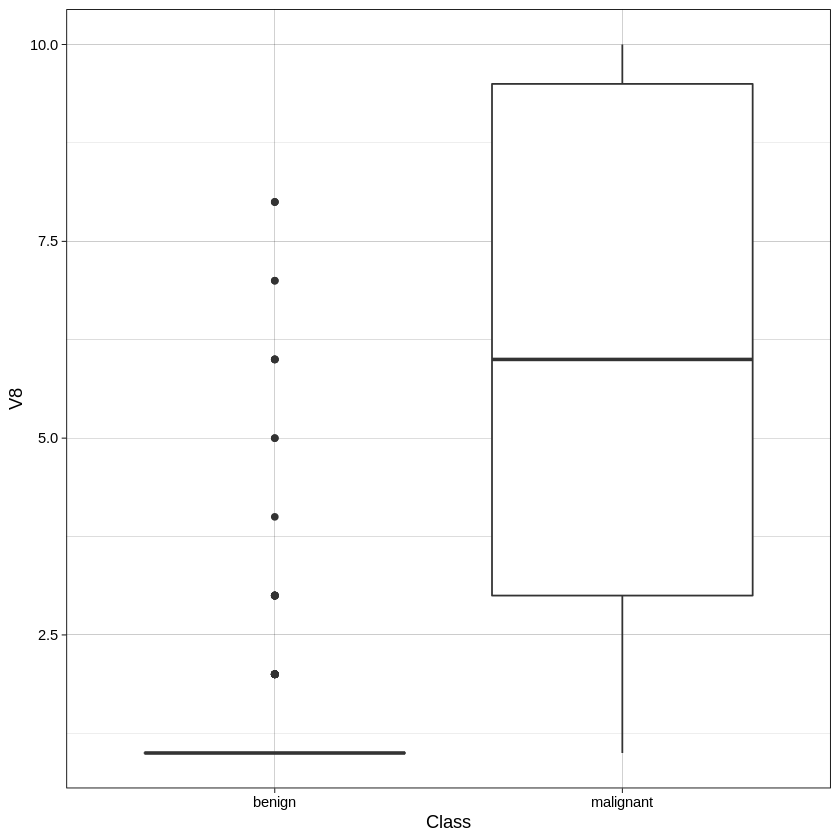

In [ ]:
ggplot(df, aes(x=class, y= V8)) + geom_boxplot() + labs(x = "Class", y = "V8") + theme_linedraw()

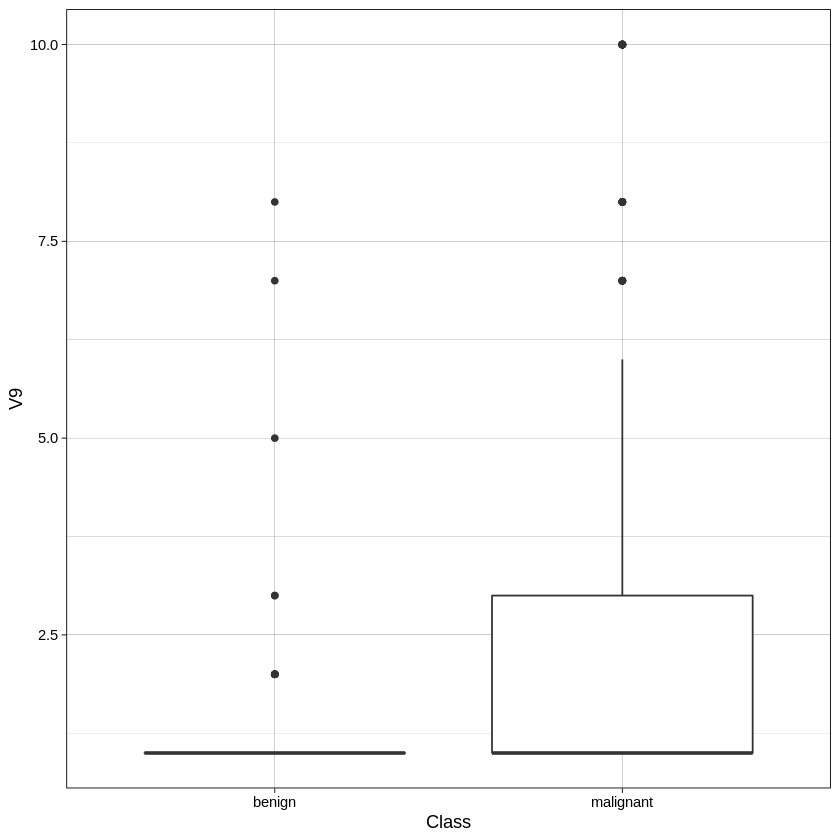

In [ ]:
ggplot(df, aes(x=class, y= V9)) + geom_boxplot() + labs(x = "Class", y = "V9") + theme_linedraw()

Analisando graficamente com os boxplots percebemos que quanto maior o valor da variável, maior parece ser a chance de se enquadrar como maligno e vice versa e as variáveis 1, 5 e 7 na lcasse benigna aceitam medias maiores

In [ ]:
summary(df[df$class == 'benign',])

      ID                  V1              V2              V3       
 Length:444         Min.   :1.000   Min.   :1.000   Min.   :1.000  
 Class :character   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000  
 Mode  :character   Median :3.000   Median :1.000   Median :1.000  
                    Mean   :2.964   Mean   :1.306   Mean   :1.414  
                    3rd Qu.:4.000   3rd Qu.:1.000   3rd Qu.:1.000  
                    Max.   :8.000   Max.   :9.000   Max.   :8.000  
       V4               V5               V6               V7       
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   :1.000  
 1st Qu.: 1.000   1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.:1.000  
 Median : 1.000   Median : 2.000   Median : 1.000   Median :2.000  
 Mean   : 1.347   Mean   : 2.108   Mean   : 1.347   Mean   :2.083  
 3rd Qu.: 1.000   3rd Qu.: 2.000   3rd Qu.: 1.000   3rd Qu.:3.000  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :7.000  
       V8              V9              class    

In [ ]:
summary(df[df$class == 'malignant',])

      ID                  V1               V2               V3        
 Length:239         Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 Class :character   1st Qu.: 5.000   1st Qu.: 4.000   1st Qu.: 4.000  
 Mode  :character   Median : 8.000   Median : 6.000   Median : 6.000  
                    Mean   : 7.188   Mean   : 6.577   Mean   : 6.561  
                    3rd Qu.:10.000   3rd Qu.:10.000   3rd Qu.: 9.000  
                    Max.   :10.000   Max.   :10.000   Max.   :10.000  
       V4               V5               V6               V7        
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 3.000   1st Qu.: 3.000   1st Qu.: 5.000   1st Qu.: 4.000  
 Median : 5.000   Median : 5.000   Median :10.000   Median : 7.000  
 Mean   : 5.586   Mean   : 5.326   Mean   : 7.628   Mean   : 5.975  
 3rd Qu.: 8.000   3rd Qu.: 6.500   3rd Qu.:10.000   3rd Qu.: 7.000  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.000  
       V8           

Para todos os benignos a mediana é menor que 3 e 75% estão abaixo de 4 e para os malignos a mediana está entre 6 e 10, com a exceção do V9. Esses números confirmam que que quanto maior o valor dos atributos maior a chance de ser maligno. 

## Modelo KNN (K-Vizinhos mais próximos)


### Dados de treino e teste

In [ ]:
# Forma 1 de criar a divisão da amostra com a biblioteca claret
#set.seed(1234)
#df_divisao <- createDataPartition(df$class, p=0.7, list = F)

#df_treino <- df[df_divisao, ] # 70% das observações
#df_teste <- df[-df_divisao, ] # 30% das observações

In [ ]:
# Forma 2 de criar a amostra com a função sample()

#set.seed(1234)
df_divisao = sample(1:nrow(df), round(nrow(df)/3))

df_treino <- df[-df_divisao, ] # 70% das observações
df_teste <- df[df_divisao, ] # 30% das observações

In [ ]:
head(df_treino)

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,1000025,5,1,1,1,2,1,3,1,1,benign
4,1016277,6,8,8,1,3,4,3,7,1,benign
5,1017023,4,1,1,3,2,1,3,1,1,benign
7,1018099,1,1,1,1,2,10,3,1,1,benign
8,1018561,2,1,2,1,2,1,3,1,1,benign
10,1033078,4,2,1,1,2,1,2,1,1,benign


In [ ]:
# Conferindo a proporção das amostras
glue('Tamanho Treino: {nrow(df_treino)} ({round(nrow(df_treino) / nrow(df),2)*100}%) /  Tamanho teste: {nrow(df_teste)} ({round(nrow(df_teste) / nrow(df),2)*100}%)')

Tamanho Treino: 455 (67%) /  Tamanho teste: 228 (33%)

In [ ]:
summary(df_treino)

      ID                  V1               V2               V3        
 Length:455         Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 Class :character   1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 1.000  
 Mode  :character   Median : 4.000   Median : 1.000   Median : 1.000  
                    Mean   : 4.484   Mean   : 3.134   Mean   : 3.178  
                    3rd Qu.: 6.000   3rd Qu.: 5.000   3rd Qu.: 5.000  
                    Max.   :10.000   Max.   :10.000   Max.   :10.000  
       V4               V5               V6               V7        
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 2.000  
 Median : 1.000   Median : 2.000   Median : 1.000   Median : 3.000  
 Mean   : 2.868   Mean   : 3.231   Mean   : 3.576   Mean   : 3.437  
 3rd Qu.: 4.000   3rd Qu.: 4.000   3rd Qu.: 7.000   3rd Qu.: 4.000  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.000  
       V8           

In [ ]:
summary(df_teste)

      ID                  V1              V2               V3        
 Length:228         Min.   : 1.00   Min.   : 1.000   Min.   : 1.000  
 Class :character   1st Qu.: 2.00   1st Qu.: 1.000   1st Qu.: 1.000  
 Mode  :character   Median : 4.00   Median : 1.000   Median : 2.000  
                    Mean   : 4.36   Mean   : 3.184   Mean   : 3.289  
                    3rd Qu.: 6.00   3rd Qu.: 5.000   3rd Qu.: 5.000  
                    Max.   :10.00   Max.   :10.000   Max.   :10.000  
       V4               V5               V6               V7        
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 2.000  
 Median : 1.000   Median : 2.000   Median : 1.000   Median : 3.000  
 Mean   : 2.754   Mean   : 3.241   Mean   : 3.482   Mean   : 3.461  
 3rd Qu.: 3.250   3rd Qu.: 4.000   3rd Qu.: 5.000   3rd Qu.: 5.000  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.000  
       V8               V9 

Os dados de treino e teste estão homogêneos e balanceados na proporção 70%, 30%

### Criando o modelo:

library class, funçao knn()

parametros: dados de treino, dados de teste, cl = a variável resposta dos dados de treino e k = número de vizinhos mais proximos qu devem ser considerados na classificação.

In [ ]:
previsao <- knn(train = df_treino[2:10], test = df_teste[2:10], cl = factor(df_treino[,11]), k= 3)
previsao

[1] benign    malignant benign    benign    benign    malignant benign   
  [8] benign    benign    benign    malignant benign    benign    benign   
 [15] benign    benign    benign    benign    malignant malignant benign   
 [22] benign    malignant benign    benign    benign    benign    malignant
 [29] malignant benign    benign    benign    benign    malignant benign   
 [36] benign    benign    benign    benign    benign    benign    benign   
 [43] benign    benign    benign    malignant malignant benign    malignant
 [50] benign    benign    benign    benign    malignant malignant malignant
 [57] benign    malignant benign    benign    benign    malignant benign   
 [64] malignant benign    benign    benign    benign    benign    malignant
 [71] benign    malignant benign    malignant malignant benign    malignant
 [78] malignant malignant malignant benign    benign    benign    benign   
 [85] benign    malignant malignant benign    benign    malignant benign   
 [92] malignant malignant malignant benign    malignant benign    malignant
 [99] benign    malignant benign    benign    benign    benign    malignant
[106] malignant malignant benign    benign    benign    benign    malignant
[113] benign    benign    benign    malignant malignant benign    benign   
[120] benign    benign    benign    benign    malignant malignant malignant
[127] malignant benign    benign    malignant benign    malignant benign   
[134] benign    benign    malignant malignant benign    benign    benign   
[141] benign    malignant malignant benign    malignant malignant benign   
[148] benign    benign    benign    benign    malignant malignant benign   
[155] malignant benign    malignant malignant malignant malignant benign   
[162] malignant benign    benign    benign    benign    benign    benign   
[169] malignant malignant benign    benign    benign    benign    benign   
[176] benign    benign    malignant benign    benign    malignant malignant
[183] malignant malignant benign    malignant benign    malignant benign   
[190] benign    malignant malignant benign    benign    malignant malignant
[197] malignant benign    malignant benign    malignant benign    benign   
[204] benign    benign    benign    benign    benign    benign    benign   
[211] benign    benign    benign    malignant malignant malignant benign   
[218] benign    benign    benign    benign    malignant benign    benign   
[225] benign    benign    benign    benign   
Levels: benign malignant

In [ ]:
summary(previsao)

benign malignant 
      147        81

### Avaliando o modelo

In [ ]:
matconf = table(df_teste[, 11], previsao, dnn = list("Previsto", "Real"))
matconf

           Real
Previsto    benign malignant
  benign       143         5
  malignant      4        76

In [ ]:
VP <- matconf[4]
VN <- matconf[1]
FP <- matconf[2]
FN <- matconf[3]
P <- VP + FN
N <- VN + FP

In [ ]:
glue('Verdadeiro Positivo = {VP}')
glue('Verdadeiro Negativo = {VN}')
glue('Falso Positivo =      {FP}')
glue('Falso Negativo =      {FN}')
glue('Número de eventos = {P}')
glue('Número de não eventos = {N}')

Verdadeiro Positivo = 76

Verdadeiro Negativo = 143

Falso Positivo =      4

Falso Negativo =      5

Número de eventos = 81

Número de não eventos = 147

Com a matriz de confusão vemos os acertos e erros de previsão do modelo. Perebemos que no que se refere à detecção de tumores malignos existem 70 previsões que são corretas (Verdadeiros positivos) e 1 que foi entendida como maligno mesmo sendo maligno (Falso positivo). Houve também 128 tumores benignos previstos corretamente (Verdadeiros Negativos) e 5 que foram classificados como benignos sendo malignos (Falsos Negativos).

**Acurácia = (VN + VP) / (P + N) É a proporção de predições corretas**

In [ ]:
acuracia <- (VN + VP) / (P + N) 
round(acuracia,4)

[1] 0.9605

In [ ]:
# Outra forma de obter a acurácia
round(sum(diag(matconf))/sum(matconf),4)

[1] 0.9605

Ao compararmos os resultados de estimados pelo modelo com os resutados reais da base de teste temos que houve acerto em 97% dos casos.

**Sensibilidade = VP / (VP + FN) É a proporção de verdadeiros positivos**

Casos positivos identificados corretamente

In [ ]:
sensibilidade <- VP / (VP + FN)
round(sensibilidade,3)

[1] 0.938

Na previsão de tumores malignos, modelo criado acertou em 93% das previsões

**Especificidade = VN / (VN + FP) É a proporção de verdadeiros negativos**

Casos negativos identificados corretamente

In [ ]:
especificidade <- VN / (VN + FP)
round(especificidade, 3)

[1] 0.973

Ao avaliarmos os casos de detecção de tumores benignos o modelo foi ainda mais assertivo e previu corretamente 93% dos casos

In [ ]:
# Podemos também obter a matriz de confusão com a função confusionMatrix():

matriz <- confusionMatrix(matconf, positive = 'malignant')
matriz

Confusion Matrix and Statistics

           Real
Previsto    benign malignant
  benign       143         5
  malignant      4        76
                                          
               Accuracy : 0.9605          
                 95% CI : (0.9264, 0.9818)
    No Information Rate : 0.6447          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9136          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9383          
            Specificity : 0.9728          
         Pos Pred Value : 0.9500          
         Neg Pred Value : 0.9662          
             Prevalence : 0.3553          
         Detection Rate : 0.3333          
   Detection Prevalence : 0.3509          
      Balanced Accuracy : 0.9555          
                                          
       'Positive' Class : malignant       
    

In [ ]:
matriz$overall[1]

Accuracy 
0.9605263

In [ ]:
matriz$byClass[1]

Sensitivity 
  0.9382716

In [ ]:
matriz$byClass[2]

Specificity 
  0.9727891

## KNN Com a reamostragem

Knn e muitos outros algoritmos de aprendizado de máquina podem apresentar resultados diferentes a cada execução, seja pela escolha aleatória dos dados de treinamento/teste, seja pela inicialização do próprio algoritmo. Assim não se deve considerar o resultado de uma única execução para se avaliar um modelos. Por esse motivo este exercício explora a execução repetidas vezes do Knn para obter a média dessas execuções. Isso pode ser feito através de um laço de programa (loop).

In [ ]:
acuracia2 = c(1:100)*0
sensibilidade2 = c(1:100)*0
especificidade2 = c(1:100)*0

for (i in 1:100) {
    df_divisao2 = sample(1:nrow(df), round(nrow(df)/3))

    df_treino2 <- df[-df_divisao2, ] # 70% das observações
    df_teste2 <- df[df_divisao2,] # 30% das observações

    classes2 = factor(df_treino2[,11])

    previsao2 <- knn(train = df_treino2[2:10], test = df_teste2[2:10], cl = classes2, k= 5)
    matconf2 = table(df_teste2[, 11], previsao2, dnn = list("Previsto", "Real"))

    VP <- matconf2[4]
    VN <- matconf2[1]
    FP <- matconf2[2]
    FN <- matconf2[3]
    P <- VP + FN
    N <- VN + FP
    acuracia2[i] <- (VN + VP) / (P + N) 
    sensibilidade2[i] <- VP / (VP + FN)
    especificidade2[i] <- VN / (VN + FP)
}

acu = mean(acuracia2)
sen = mean(sensibilidade2)
esp = mean(especificidade2)

glue('A acuracidade do modelo baseada na média de 100 execuções é de {round(acu *100,2)}%')
glue('A sensibilidade do modelo baseada na média de 100 execuções é de {round(sen *100,2)}%')
glue('A especificidade do modelo baseada na média de 100 execuções é de {round(esp *100,2)}%')

A acuracidade do modelo baseada na média de 100 execuções é de 97.14%

A sensibilidade do modelo baseada na média de 100 execuções é de 95.75%

A especificidade do modelo baseada na média de 100 execuções é de 97.89%

k = 2

'A acuracidade do modelo baseada na média de 100 execuções é de 96.17%'

'A sensibilidade do modelo baseada na média de 100 execuções é de 95.15%'

'A especificidade do modelo baseada na média de 100 execuções é de 96.71%'

**k = 3**

'A acuracidade do modelo baseada na média de 100 execuções é de 97.25%'

'A sensibilidade do modelo baseada na média de 100 execuções é de 95.88%'

'A especificidade do modelo baseada na média de 100 execuções é de 98.01%'

k = 5

'A acuracidade do modelo baseada na média de 100 execuções é de 96.91%'

'A sensibilidade do modelo baseada na média de 100 execuções é de 95.53%'

'A especificidade do modelo baseada na média de 100 execuções é de 97.67%'

k = 12

'A acuracidade do modelo baseada na média de 100 execuções é de 96.69%'

'A sensibilidade do modelo baseada na média de 100 execuções é de 95.81%'

'A especificidade do modelo baseada na média de 100 execuções é de 97.18%'


Os resultados da acuracidade (96.74%), sensibilidade (95.4%) e especificidade (97.47%) desse modelo são baseados na média de 100 diferentes execuções com 100 amostragens diferentes do conjunto total dos dados. Testando para diferentes valores de K observamos que o que apresenta o melhor desempenho é o modelo que considera 3 vizinhos.

## Diferente tratamento dos NA para modelagem
Na primeira execução do modelo, o critério para o tratamento dos NANs foi o de excluir as 16 linhas faltantes, neste teste removeremos a coluna com os dados faltantes e faremos uma nova comparação. 

In [ ]:
df2 <- biopsy
df2$V6 <- NULL

In [ ]:
head(df2)

,ID,V1,V2,V3,V4,V5,V7,V8,V9,class
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,1000025,5,1,1,1,2,3,1,1,benign
2,1002945,5,4,4,5,7,3,2,1,benign
3,1015425,3,1,1,1,2,3,1,1,benign
4,1016277,6,8,8,1,3,3,7,1,benign
5,1017023,4,1,1,3,2,3,1,1,benign
6,1017122,8,10,10,8,7,9,7,1,malignant


In [ ]:
ncol(df2)

[1] 10

In [ ]:
acuracia2 = c(1:100)*0
sensibilidade2 = c(1:100)*0
especificidade2 = c(1:100)*0

for (i in 1:100) {
    df_divisao2 = sample(1:nrow(df2), round(nrow(df2)/3))

    df_treino2 <- df2[-df_divisao2, ] # 70% das observações
    df_teste2 <-  df2[df_divisao2,] # 30% das observações

    classes2 = factor(df_treino2[,10])

    previsao2 <- knn(train = df_treino2[2:9], test = df_teste2[2:9], cl = classes2, k= 3)
    matconf2 = table(df_teste2[, 10], previsao2, dnn = list("Previsto", "Real"))

    VP <- matconf2[4]
    VN <- matconf2[1]
    FP <- matconf2[2]
    FN <- matconf2[3]
    P <- VP + FN
    N <- VN + FP
    acuracia2[i] <- (VN + VP) / (P + N) 
    sensibilidade2[i] <- VP / (VP + FN)
    especificidade2[i] <- VN / (VN + FP)
}

acu = mean(acuracia2)
sen = mean(sensibilidade2)
esp = mean(especificidade2)

glue('A acuracidade do modelo baseada na média de 100 execuções é de {round(acu *100,2)}%')
glue('A sensibilidade do modelo baseada na média de 100 execuções é de {round(sen *100,2)}%')
glue('A especificidade do modelo baseada na média de 100 execuções é de {round(esp *100,2)}%')

A acuracidade do modelo baseada na média de 100 execuções é de 95.76%

A sensibilidade do modelo baseada na média de 100 execuções é de 93.76%

A especificidade do modelo baseada na média de 100 execuções é de 96.85%

Vemos que o modelo que considerou o dataset com a exclusão das linhas com dados faltantes apresenta um resultado levemente melhor, enquanto o modelo que excluiu a coluna inteira apresenta um desempenho pior. 